# 第七次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）对附件中的两幅图像分别进行DFT，以log(1+abs(f))形式显示信号频谱。从空域观察：两张图片中并没有明显的水平和垂直边缘，但从图像频谱显示其包含有强烈的水平与垂直分量，请分析其原因，提出相应的解决办法并进行验证。

## 对附件中的两幅图像分别进行DFT，以log(1+abs(f))形式显示信号频谱

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import scipy.signal as signal
import math

(-0.5, 255.5, 255.5, -0.5)

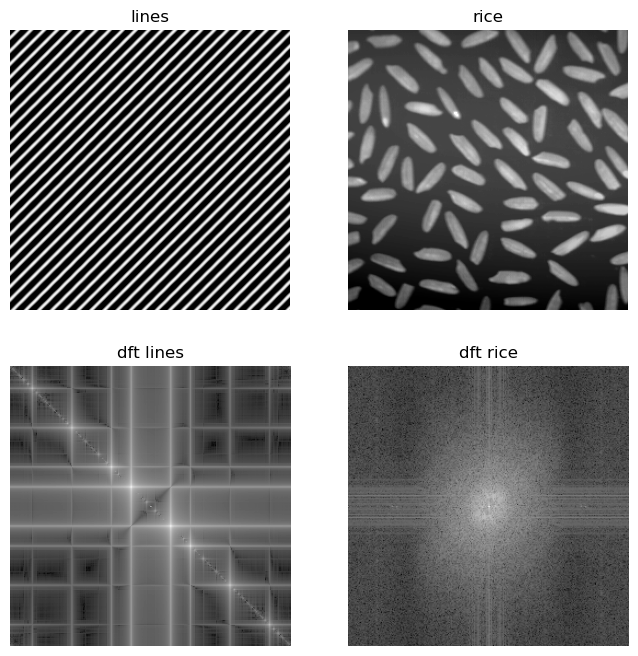

In [2]:
plt.figure(figsize=(8,8))

l_img = io.imread("lines.png",as_gray=True)
r_img = io.imread("rice.png",as_gray=True)
l_dft = np.fft.fft2(l_img)
r_dft = np.fft.fft2(r_img)

plt.subplot(221)
plt.imshow(l_img,plt.cm.gray)
plt.title('lines')
plt.axis('off')

plt.subplot(222)
plt.imshow(r_img,plt.cm.gray)
plt.title('rice')
plt.axis('off')

plt.subplot(223)
plt.imshow(np.log10(1+abs(np.fft.fftshift(l_dft))),plt.cm.gray)
plt.title('dft lines')
plt.axis('off')

plt.subplot(224)
plt.imshow(np.log10(1+abs(np.fft.fftshift(r_dft))),plt.cm.gray)
plt.title('dft rice')
plt.axis('off')

## 分析图像频谱显示其包含有强烈的水平与垂直分量的原因，提出相应的解决办法并进行验证。

原图出现这样的现象是因为取样后的dft具有周期延拓性，边缘有明显的不连续，因此需要使用汉明窗等类似的窗处理边缘，使不连续现象得到改善。在此我使用用汉宁窗方法：

(-0.5, 255.5, 255.5, -0.5)

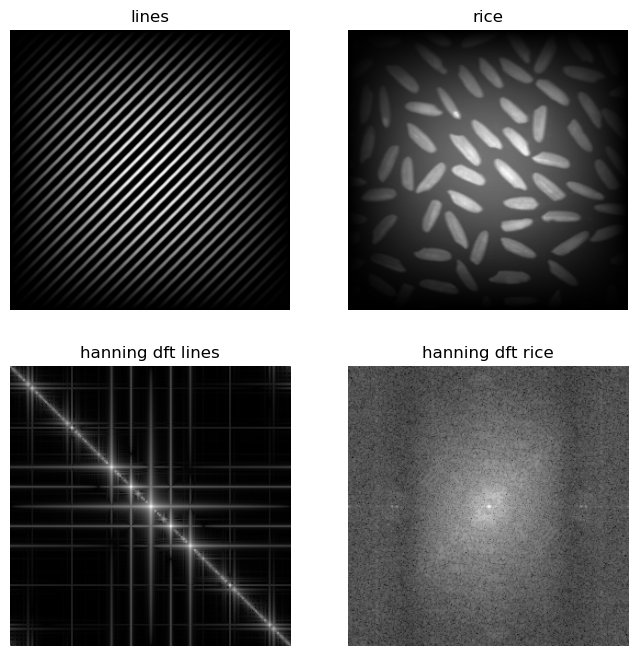

In [3]:
plt.figure(figsize=(8,8))

l_img = io.imread("lines.png",as_gray=True)
l_h=l_img.shape[0]
l_w=l_img.shape[1]
l_win1=np.hanning(l_h)
l_win2=np.hanning(l_w)
l_win=np.sqrt(np.outer(l_win1,l_win2))
l_img2=l_win*l_img

r_img = io.imread("rice.png",as_gray=True)
r_h=r_img.shape[0]
r_w=r_img.shape[1]
r_win1=np.hanning(r_h)
r_win2=np.hanning(r_w)
r_win=np.sqrt(np.outer(r_win1,r_win2))
r_img2=r_win*r_img

l_dft2=np.fft.fft2(l_img2)
r_dft2=np.fft.fft2(r_img2)

plt.subplot(221)
plt.imshow(l_img2,plt.cm.gray)
plt.title('lines')
plt.axis('off')

plt.subplot(222)
plt.imshow(r_img2,plt.cm.gray)
plt.title('rice')
plt.axis('off')

plt.subplot(223)
plt.imshow(np.log10(1+abs(np.fft.fftshift(l_dft2))),plt.cm.gray)
plt.title('hanning dft lines')
plt.axis('off')

plt.subplot(224)
plt.imshow(np.log10(1+abs(np.fft.fftshift(r_dft2))),plt.cm.gray)
plt.title('hanning dft rice')
plt.axis('off')

可以看出，汉宁窗明显地改善了边缘不连续的问题，频谱水平和垂直的分量降低。

## （2）选一张灰度图像，然后顺序进行下列处理操作:
A.对(x,y)位置上的像素值乘以$(-1)^{x+y}$
\
B.计算图像二维DFT
\
C.对二维DFT的值取共轭
\
D.对共轭后的频谱做IDFT运算
\
E.对IDFT的结果取实部
\
F.对实部乘以$(-1)^{x+y}$

## 代码实践

(-0.5, 332.5, 499.5, -0.5)

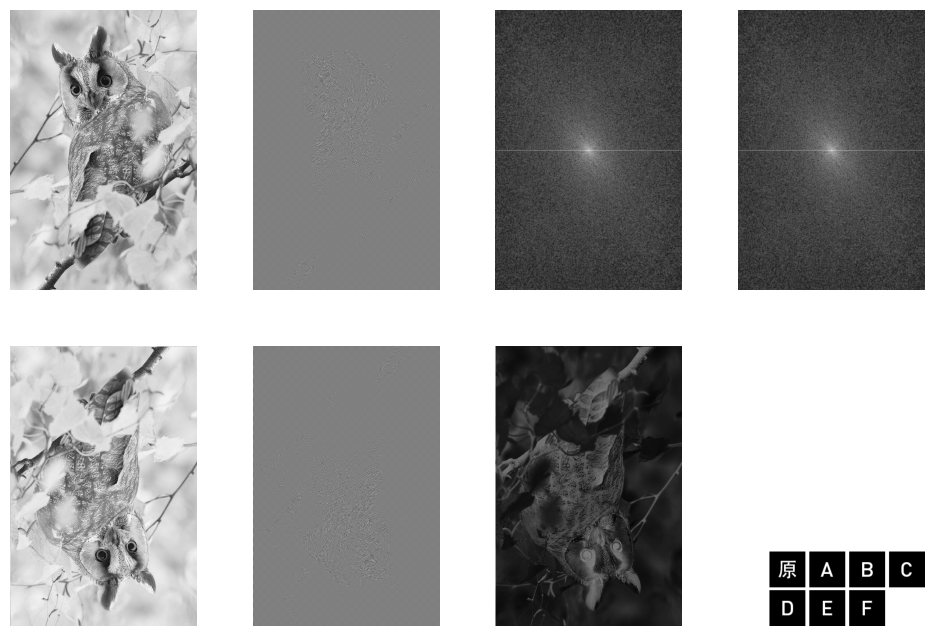

In [4]:
img=io.imread("owl.png",as_gray=True)
arr=img
arr.flags["WRITEABLE"]=False
arr_A=np.copy(arr)
arr_A.flags["WRITEABLE"]=True

plt.figure(figsize=(12,8))

# 原图
plt.subplot(241)
plt.imshow(arr,plt.cm.gray)
plt.axis('off')

# A
for x in range(arr.shape[0]):
    for y in range(arr.shape[1]):
        arr_A[x][y]=arr[x][y]*math.pow(-1,x+y)
        
plt.subplot(242)
plt.imshow(arr_A,plt.cm.gray)
plt.axis('off')

# B
arr_B=np.fft.fft2(arr_A)
plt.subplot(243)
plt.imshow(np.log10(1+abs(arr_B)),plt.cm.gray)
plt.axis('off')

# C
arr_C=np.conjugate(arr_B)
plt.subplot(244)
plt.imshow(np.log10(1+abs(arr_C)),plt.cm.gray)
plt.axis('off')

# D
arr_D=np.fft.ifft2(arr_C)
plt.subplot(245)
plt.imshow(np.log10(1+abs(arr_D)),plt.cm.gray)
plt.axis('off')

# E
arr_E=np.real(arr_D)
plt.subplot(246)
plt.imshow(arr_E,plt.cm.gray)
plt.axis('off')

# F
arr_E.flags["WRITEABLE"]=False
arr_F=np.copy(arr_E)
arr_F.flags["WRITEABLE"]=True
for x in range(arr_E.shape[0]):
    for y in range(arr_E.shape[1]):
        arr_F[x][y]=arr_E[x][y]*math.pow(-1,x+y)
        
plt.subplot(247)
plt.imshow(arr_F,plt.cm.gray)
plt.axis('off')

tips=io.imread("tips.png",as_gray=True)
plt.subplot(248)
plt.imshow(tips,plt.cm.gray)
plt.axis('off')

## 理论分析：与原始图像进行对比，从理论上分析为什么会出现这种结果。

对比原始图像，会发现图像旋转了180度，且颜色反相。这主要是因为在步骤C时对数据取了共轭。

步骤D与E互为逆变换，即$DFT(IDFT(a))=a$，因此对结果没有影响。回顾DFT与IDFT变换如下：

对于一张大小为$M\times N$的图像$f(x)$，其二维傅里叶变换（DFT）为
$$
F(u,v)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)e^{-j2\pi(ux/M+vy/N)}
$$
而对于给定$F(u,v)$，可以根据傅里叶反变换（IDFT）获得$f(x,y)$
$$
f(x,y)=\frac{1}{MN}\sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v)e^{j2\pi(ux/M+vy/N)}
$$

先对步骤C对结果的影响进行解释：用极坐标的性质表示$F(u,v)$，为
$$
F(u,v)=|F(u,v)|e^{j\phi(u,v)}
$$
其中，$|F(u,v)|$被称为频谱（spectrum），决定了图像的颜色；$e^{j\phi(u,v)}$被称为相位角（phase angle），决定了图像的形状。对于原始数据$C=|C|e^{j\theta}$，共轭后数据为$C^*=|C|e^{-j\theta}$，因此图像将旋转180度。至于图像颜色为何反相未能推导出来，但应该与图像的$M\times N$相关，结论为，当图像$M\times N$为偶数时，$|F(u,v)|=F(u,v)$，当图像$M\times N$为奇数时，$|F(u,v)|=-F(u,v)$。下方列出当图像$M\times N$为偶数时的代码实践结果。

(-0.5, 332.5, 499.5, -0.5)

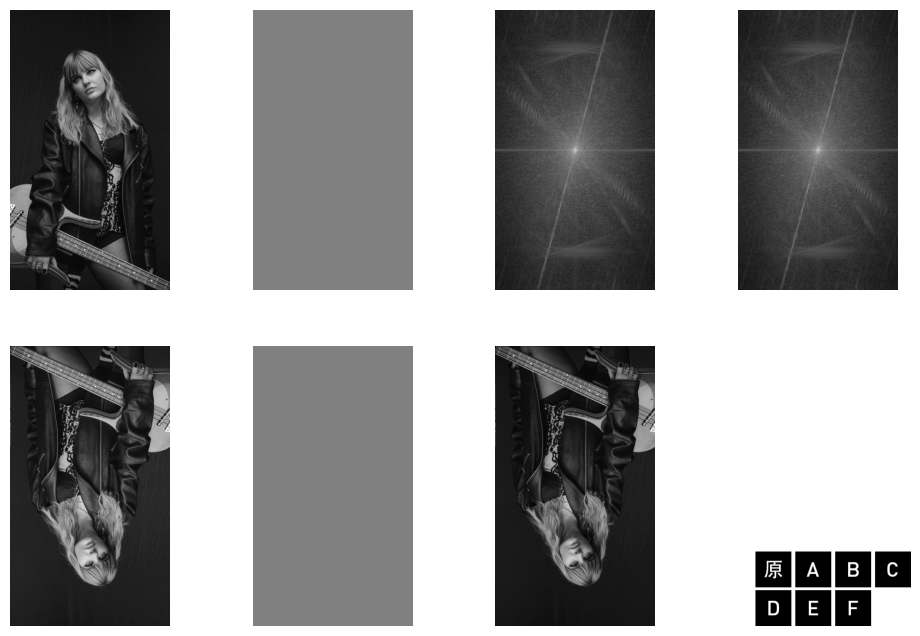

In [5]:
img=io.imread("img_3.jpg",as_gray=True)
arr=img
arr.flags["WRITEABLE"]=False
arr_A=np.copy(arr)
arr_A.flags["WRITEABLE"]=True

plt.figure(figsize=(12,8))

# 原图
plt.subplot(241)
plt.imshow(arr,plt.cm.gray)
plt.axis('off')

# A
for x in range(arr.shape[0]):
    for y in range(arr.shape[1]):
        arr_A[x][y]=arr[x][y]*math.pow(-1,x+y)
        
plt.subplot(242)
plt.imshow(arr_A,plt.cm.gray)
plt.axis('off')

# B
arr_B=np.fft.fft2(arr_A)
plt.subplot(243)
plt.imshow(np.log10(1+abs(arr_B)),plt.cm.gray)
plt.axis('off')

# C
arr_C=np.conjugate(arr_B)
plt.subplot(244)
plt.imshow(np.log10(1+abs(arr_C)),plt.cm.gray)
plt.axis('off')

# D
arr_D=np.fft.ifft2(arr_C)
plt.subplot(245)
plt.imshow(np.log10(1+abs(arr_D)),plt.cm.gray)
plt.axis('off')

# E
arr_E=np.real(arr_D)
plt.subplot(246)
plt.imshow(arr_E,plt.cm.gray)
plt.axis('off')

# F
arr_E.flags["WRITEABLE"]=False
arr_F=np.copy(arr_E)
arr_F.flags["WRITEABLE"]=True
for x in range(arr_E.shape[0]):
    for y in range(arr_E.shape[1]):
        arr_F[x][y]=arr_E[x][y]*math.pow(-1,x+y)
        
plt.subplot(247)
plt.imshow(arr_F,plt.cm.gray)
plt.axis('off')

tips=io.imread("tips.png",as_gray=True)
plt.subplot(248)
plt.imshow(tips,plt.cm.gray)
plt.axis('off')